<a href="https://colab.research.google.com/github/ritikaanair/SC_task1/blob/main/SCT_DS_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving gender_submission.csv to gender_submission (1).csv
Saving test.csv to test (1).csv
Saving train.csv to train (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp 

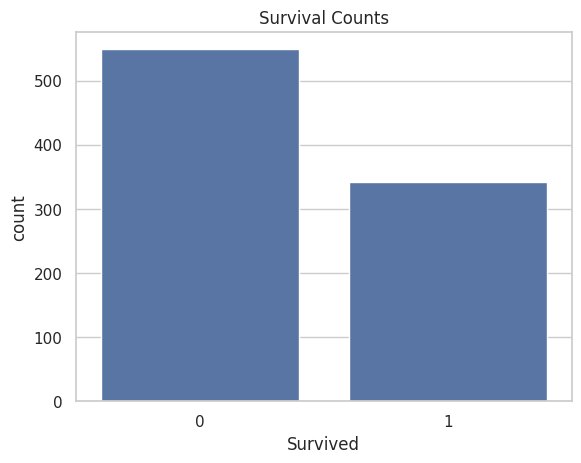

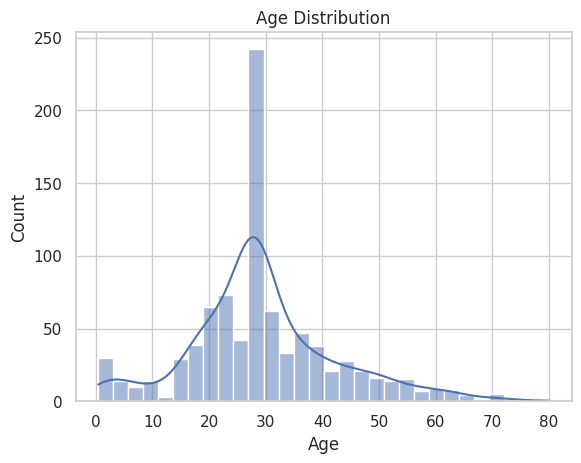

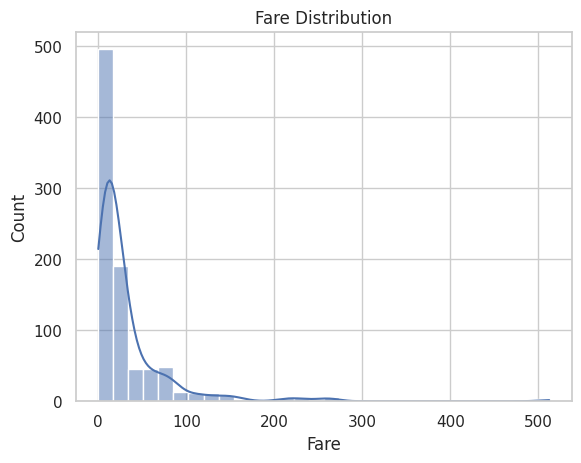

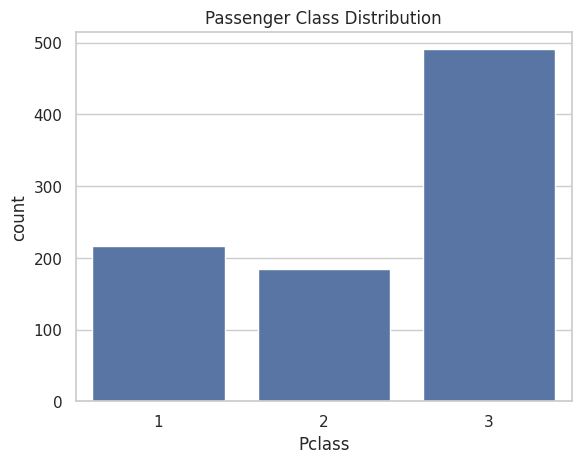

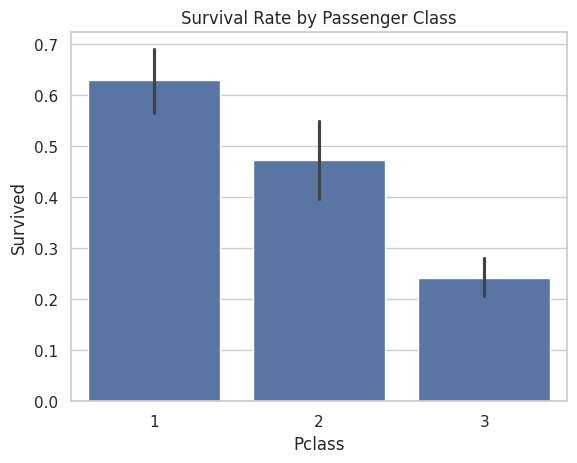

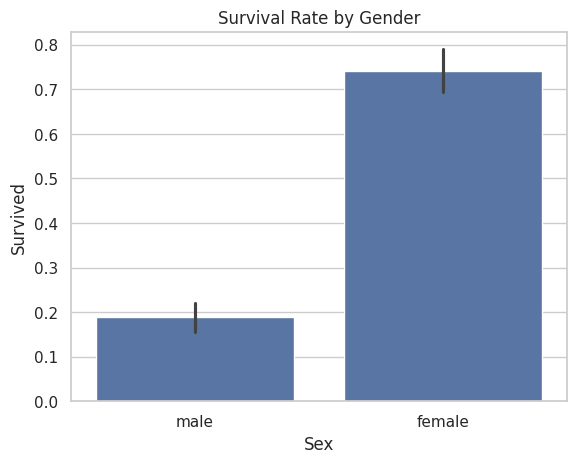

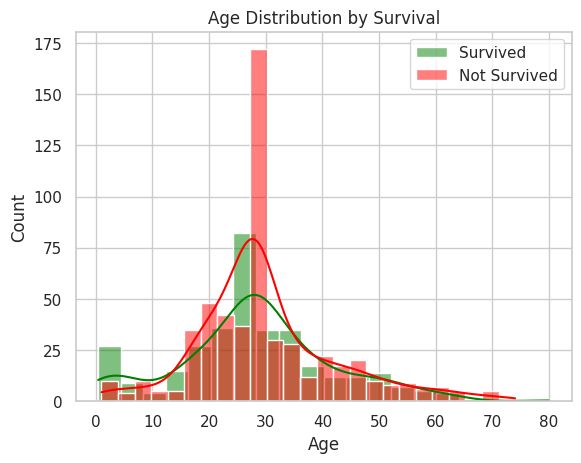

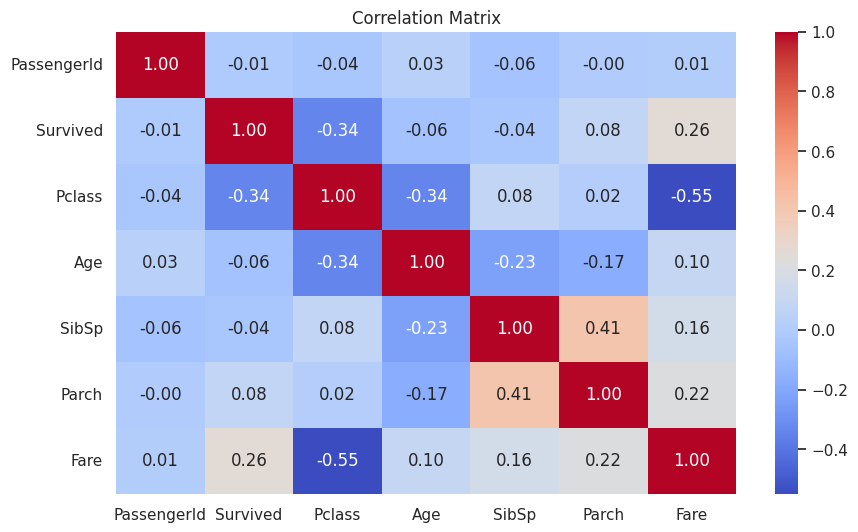

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  FamilySize  
count  891.000000  891.000000  891.000000  
mean     0.381594   32.204208    1.904602  
std      0.806057   49.693429    1.613459  
min      0.000000    0.000000    1.000000  
25%      0.000000    7.910400    1.000000  
50%      0.000000   14.454200    1.000000  
75%      0.000000   31.000000    2.000000  
max      6.000000

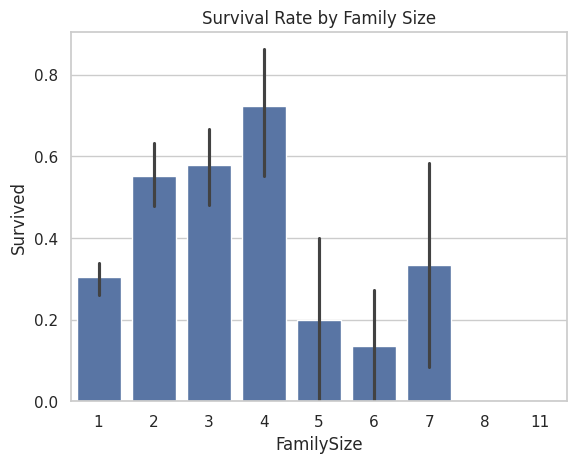

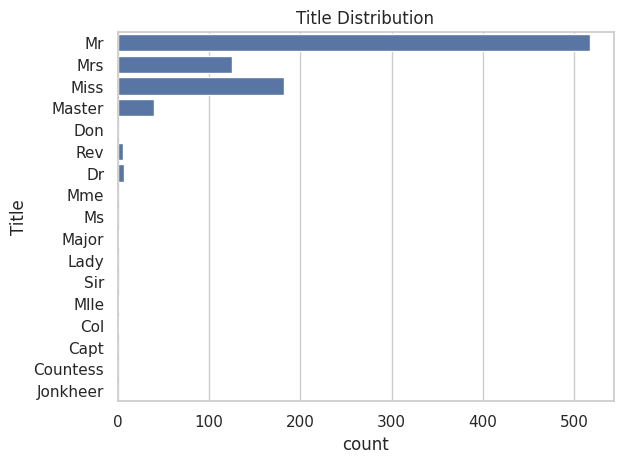

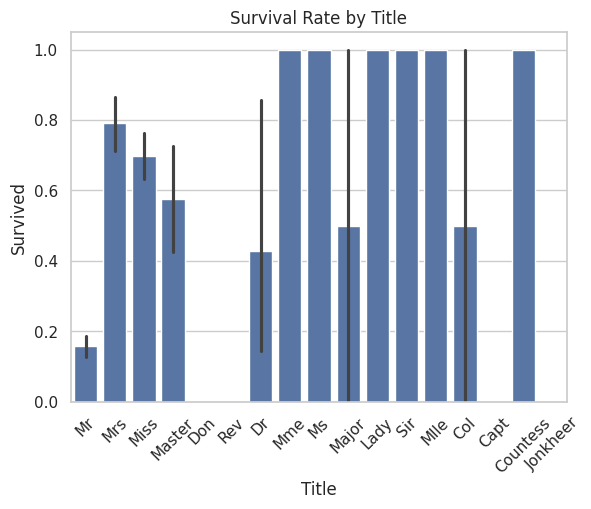

In [7]:
# Install necessary libraries
!pip install seaborn matplotlib pandas numpy

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styles
sns.set(style='whitegrid')

# Step 2: Upload the Files
from google.colab import files
uploaded = files.upload()

# Step 3: Load the Datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
gender_submission_df = pd.read_csv('gender_submission.csv')

# View basic info about the datasets
train_df.info()
train_df.head()

# Step 4: Data Cleaning
# Check for missing data in the training set
print(train_df.isnull().sum())

# Fill missing Age values with the median
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

# Fill missing Embarked values with the most frequent value
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Fill missing Fare values in the test dataset
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

# Drop Cabin column due to too many missing values
train_df.drop(columns=['Cabin'], inplace=True)
test_df.drop(columns=['Cabin'], inplace=True)

# Verify there are no missing values left
print(train_df.isnull().sum())

# Step 5: Exploratory Data Analysis (EDA)

# Univariate Analysis

# 1. Plot survival counts
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Counts')
plt.show()

# 2. Distribution of Age
sns.histplot(train_df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

# 3. Distribution of Fare
sns.histplot(train_df['Fare'], kde=True, bins=30)
plt.title('Fare Distribution')
plt.show()

# 4. Count plot of Pclass
sns.countplot(x='Pclass', data=train_df)
plt.title('Passenger Class Distribution')
plt.show()

# Bivariate Analysis

# 5. Survival by Passenger Class
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival Rate by Passenger Class')
plt.show()

# 6. Survival by Gender
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival Rate by Gender')
plt.show()

# 7. Age vs. Survival
sns.histplot(train_df[train_df['Survived'] == 1]['Age'], kde=True, color='green', label='Survived')
sns.histplot(train_df[train_df['Survived'] == 0]['Age'], kde=True, color='red', label='Not Survived')
plt.legend()
plt.title('Age Distribution by Survival')
plt.show()

# 8. Correlation Heatmap
# Select only numerical columns from the DataFrame for the correlation heatmap
numeric_columns = train_df.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Step 6: Feature Engineering

# Create a new feature 'FamilySize' as the sum of 'SibSp' and 'Parch'
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

# Extract Titles from the names
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# View the first few rows of the new features
train_df[['Name', 'Title', 'FamilySize']].head()

# Step 7: Summary Statistics

# Summary statistics of the training set
print(train_df.describe())

# 9. Survival rate by Family Size
sns.barplot(x='FamilySize', y='Survived', data=train_df)
plt.title('Survival Rate by Family Size')
plt.show()

# Countplot of Titles
sns.countplot(y='Title', data=train_df)
plt.title('Title Distribution')
plt.show()

# Survival by Title
sns.barplot(x='Title', y='Survived', data=train_df)
plt.title('Survival Rate by Title')
plt.xticks(rotation=45)
plt.show()

# Step 8: Save Cleaned Data (Optional)
# Save the cleaned data
train_df.to_csv('cleaned_train.csv', index=False)
test_df.to_csv('cleaned_test.csv', index=False)

